In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

data = pd.read_csv("Analysis1.csv")
data

,FIPS,Admin2,Province_State,Country_Region,Date,Latitude,Longitude,Confirmed,Deaths
0,NaN,NaN,Australian Capital Territory,Australia,2/11/21 4:22,-35.473500,149.012400,1788,13
1,NaN,NaN,New South Wales,Australia,2/11/21 4:22,-33.868800,151.209300,75578,576
2,NaN,NaN,Northern Territory,Australia,2/11/21 4:22,-12.463400,130.845600,225,0
3,NaN,NaN,Queensland,Australia,2/11/21 4:22,-27.469800,153.025100,2090,7
4,NaN,NaN,South Australia,Australia,2/11/21 4:22,-34.928500,138.600700,918,4
...,...,...,...,...,...,...,...,...,...
119807,NaN,NaN,NaN,Vietnam,1/12/21 4:22,14.058324,108.277199,1238082,25252
119808,NaN,NaN,NaN,West Bank and Gaza,1/12/21 4:22,31.952200,35.233200,460053,4796
119809,NaN,NaN,NaN,Yemen,1/12/21 4:22,15.552727,48.516388,10004,1950
119810,NaN,NaN,NaN,Zambia,1/12/21 4:22,-13.133897,27.849332,210169,3667


In [43]:
df = data[data['Country_Region'].isin([ "Australia","US","United Kingdom","New Zealand","Italy","Israel", "Brazil", "South Africa"])]
df.dropna(axis=1, how="all")

,FIPS,Admin2,Province_State,Country_Region,Date,Latitude,Longitude,Confirmed,Deaths
0,NaN,NaN,Australian Capital Territory,Australia,2/11/21 4:22,-35.473500,149.012400,1788,13
1,NaN,NaN,New South Wales,Australia,2/11/21 4:22,-33.868800,151.209300,75578,576
2,NaN,NaN,Northern Territory,Australia,2/11/21 4:22,-12.463400,130.845600,225,0
3,NaN,NaN,Queensland,Australia,2/11/21 4:22,-27.469800,153.025100,2090,7
4,NaN,NaN,South Australia,Australia,2/11/21 4:22,-34.928500,138.600700,918,4
...,...,...,...,...,...,...,...,...,...
119799,56039.0,Teton,Wyoming,US,1/12/21 4:22,43.935225,-110.589080,5390,14
119800,56041.0,Uinta,Wyoming,US,1/12/21 4:22,41.287818,-110.547578,4047,31
119801,90056.0,Unassigned,Wyoming,US,1/12/21 4:22,NaN,NaN,0,0
119802,56043.0,Washakie,Wyoming,US,1/12/21 4:22,43.904516,-107.680187,1862,36


Country_Region
Australia            57020
Brazil            18342121
Israel              244472
Italy              3987145
New Zealand           1077
South Africa       2685302
US                22980649
United Kingdom     4304969
Name: Deaths, dtype: int64

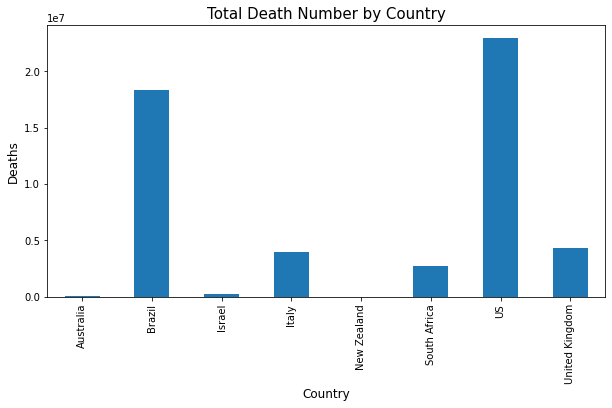

In [52]:
Country_Death = df.groupby(["Country_Region"]).sum()["Deaths"]
Bar_Pandas = Country_Death.plot.bar(figsize=(10,5), rot=90)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Deaths", fontsize=12)
plt.title("Total Death Number by Country", fontsize=15)
Country_Death

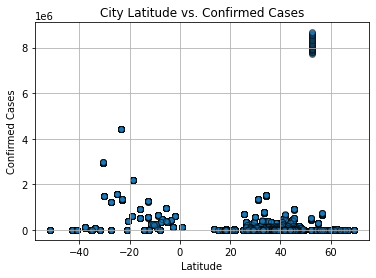

In [46]:
plt.scatter(df['Latitude'],df['Confirmed'],alpha=0.5,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Confirmed Cases')
plt.title('City Latitude vs. Confirmed Cases')
plt.grid()

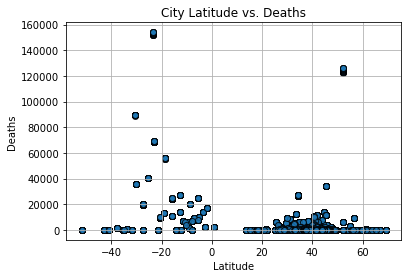

In [47]:
plt.scatter(df['Latitude'],df['Deaths'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Deaths')
plt.title('City Latitude vs. Deaths')
plt.grid()

Text(0, 100000, 'y = nanx nan')

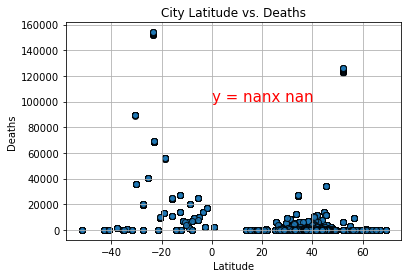

In [49]:
plt.scatter(df['Latitude'],df['Deaths'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Deaths')
plt.title('City Latitude vs. Deaths')
plt.grid()

x_values = df['Latitude']
y_values = df['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100000),fontsize=15,color="red")